# (PSL) Coding Assignment 2

## Part II: Simulation Study¶

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lm
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [80]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

### Load Data


In [84]:
url = "https://raw.githubusercontent.com/liangfgithub/liangfgithub.github.io/master/Data/Coding2_Data2.csv"
url = "Coding2_Data2.csv"
myData = pd.read_csv(url)
# myData.head()
Y = myData['Y']
X = myData.drop(['Y'], axis = 1)


In [85]:
X.shape, len(Y)
myData

,Y,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91
0,3.178054,-5.064036,1.8,0.837248,0,-0.619897,1.883275,3.432567,1.408545,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.588344,22.585037,12.698557,1.805358,1.015072,8.857186
1,3.072693,-3.600502,0.0,1.955860,0,-0.757153,1.859574,5.529585,1.602836,0.693147,...,3.804642,0.857042,2.751101,2.095553,6.786799,21.785594,16.594394,4.907472,3.738090,11.999253
2,3.546740,-3.601235,0.0,1.955860,0,-0.757153,1.971996,2.918119,1.602836,0.693147,...,3.804642,0.857042,2.722890,1.391483,6.786799,21.562194,11.018966,4.857148,2.482157,7.886007
3,3.508556,-3.430523,0.0,0.779325,0,-0.780886,1.945624,1.419592,1.802073,1.098612,...,5.935448,1.947005,4.335454,1.883728,9.574845,21.320586,9.263662,6.993794,3.038760,6.766495
4,3.589059,-2.672924,0.0,0.779325,0,-0.780886,1.966693,2.162710,1.802073,1.098612,...,5.935448,1.947005,4.360392,2.536343,9.574845,21.443227,12.473049,7.034024,4.091536,9.163148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.109061,-2.770511,0.0,2.479056,0,-0.556870,1.886008,3.969128,0.907694,0.000000,...,0.000000,0.000000,0.000000,0.000000,24.945695,21.988568,17.443563,17.432057,13.828876,12.189565
502,3.025291,-3.095111,0.0,2.479056,0,-0.556870,1.811562,5.152149,0.827460,0.000000,...,0.000000,0.000000,0.000000,0.000000,24.945695,22.263994,16.903043,17.650408,13.400363,11.959803
503,3.173878,-2.800824,0.0,2.479056,0,-0.556870,1.942476,7.899571,0.773574,0.000000,...,0.000000,0.000000,0.000000,0.000000,24.945695,22.263994,13.321757,17.650408,10.561198,9.425853
504,3.091042,-2.211009,0.0,2.479056,0,-0.556870,1.916040,7.535788,0.870833,0.000000,...,0.000000,0.000000,0.000000,0.000000,24.945695,22.070467,14.279384,17.496984,11.320384,10.015602


In [86]:
n = len(Y)
indices = np.arange(0, n)
np.random.shuffle(indices)
test_ind = indices[:int(np.floor(0.25*n))]
train_ind = indices[len(test_ind):]

# Splitting the data into training and testing sets
X_train = X.iloc[train_ind]
Y_train = Y[train_ind]
X_test = X.iloc[test_ind]
Y_test = Y[test_ind]



In [87]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Full Model

In [88]:
full = lm().fit(X_train, Y_train)
mean_squared_error(Y_test, full.predict(X_test))

0.029116287480807072

### Ridge Regression

In [89]:
ridge_alphas = np.logspace(-10, 1, 100)
ridgecv = RidgeCV(alphas = ridge_alphas, cv = 10, 
                  scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, Y_train)
ridgecv.alpha_

4.641588833612772

In [90]:
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(X_train, Y_train)
mean_squared_error(Y_test, ridge_model.predict(X_test))


0.032513785151265934

### Ridge Regression - Scaled

In [94]:
ridge_scaled_alphas = np.logspace(-10, 1, 100)
ridge_scaled_ridgecv = RidgeCV(alphas = ridge_scaled_alphas, cv = 10, 
                  scoring = 'neg_mean_squared_error')
ridge_scaled_ridgecv.fit(X_train_scaled, Y_train)
ridge_scaled_ridgecv.alpha_

1.6681005372000557

In [95]:
ridge_scaled_model = Ridge(alpha = ridge_scaled_ridgecv.alpha_)
ridge_scaled_model.fit(X_train_scaled, Y_train)
mean_squared_error(Y_test, ridge_scaled_model.predict(X_test_scaled))


0.032706862563539954

In [96]:
print("full model coef:", np.round(full.coef_, 3))
print("ridge coef:", np.round(ridge_model.coef_, 3))
print("ridge scaled coef:", np.round(ridge_scaled_model.coef_, 3))
#print(np.round(full.coef_, 0))

full model coef: [-9.820e-01 -6.760e-01 -2.000e+00 -2.900e-02  2.648e+00 -4.200e-01
  3.920e-01  1.876e+00  8.620e-01  3.430e+00 -1.394e+00  5.650e-01
  1.286e+00 -4.100e-02 -3.000e-03  1.140e-01  3.906e+00  4.430e-01
  4.000e-03  3.030e-01  7.000e-03 -3.760e-01 -1.000e-03 -3.400e-02
  4.000e-03 -4.000e-03  9.500e-02 -1.260e-01  2.300e-01 -9.000e-03
 -5.700e-02 -3.000e-03  3.800e-02  1.100e-02 -9.000e-03  2.400e-02
  2.300e-02 -2.370e-01 -7.000e-02  1.000e-03 -2.000e-02 -2.400e-02
  9.800e-02 -1.700e-02  5.500e-02 -3.200e-02 -9.530e-01  2.700e-02
  1.300e-02 -6.600e-02 -1.530e-01  1.410e-01 -8.000e-03  1.640e-01
 -5.200e-02 -1.432e+00 -9.000e-02  2.587e+00 -7.000e-03  5.340e-01
 -2.580e-01  2.380e-01  1.700e-01 -1.090e-01 -2.600e-02 -8.370e-01
  4.840e-01 -3.720e-01  8.000e-03 -2.100e-01 -2.900e-02  4.200e-02
 -4.300e-02  2.000e-03 -2.100e-02 -1.800e-02  6.300e-02 -1.510e-01
  5.100e-02 -1.160e-01  9.100e-02  2.300e-01 -8.400e-02 -6.900e-02
 -5.000e-02  3.200e-01 -7.100e-02 -1.040e-01 

In [78]:
np.logspace(0, 3, num=5)

array([   1.        ,    5.62341325,   31.6227766 ,  177.827941  ,
       1000.        ])

### Lasso

You may encounter convergence warnings while running the code. If you find these warnings distracting, they can be suppressed.

In [ ]:
# import warnings
# from sklearn.exceptions import ConvergenceWarning
# warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
lasso_alphas = np.logspace(-10, 1, 100)
lassocv = LassoCV(alphas = lasso_alphas, cv = 10)
lassocv.fit(X_train, Y_train)
lassocv.alpha_

In [16]:
mean_mse = np.mean(lassocv.mse_path_, axis=1)
std_mse = np.std(lassocv.mse_path_, axis=1) / np.sqrt(10) 

cv_alphas = lassocv.alphas_
min_idx = np.argmin(mean_mse)

alpha_min = cv_alphas[min_idx]

threshold = mean_mse[min_idx] + std_mse[min_idx]
alpha_1se = max(cv_alphas[np.where(mean_mse <= threshold)])

alpha_min, alpha_1se  #alpha_min = lassocv.alpha_

(0.00027825594022071204, 0.004641588833612773)

Lasso with alpha_min



In [ ]:
lasso_model_min = Lasso(alpha = alpha_min, max_iter=10000)
lasso_model_min.fit(X_train, Y_train)
mean_squared_error(Y_test, lasso_model_min.predict(X_test))

Lasso with alpha_1se



In [19]:
lasso_model_1se = Lasso(alpha = alpha_1se, max_iter=10000)
lasso_model_1se.fit(X_train, Y_train)
mean_squared_error(Y_test, lasso_model_1se.predict(X_test))

0.027752051517298967

Refit with alpha_1se



In [20]:
nonzero_indices = np.where(lasso_model_1se.coef_ != 0)[0]
lm_refit = lm()
lm_refit.fit(X_train.iloc[:, nonzero_indices], Y_train)
mean_squared_error(Y_test, lm_refit.predict(X_test.iloc[:, nonzero_indices]))

0.026800302435486898

### PCR

This sample code demonstrates the implementation of Principal Component Regression (PCR) using 10-fold cross-validation for selecting the optimal number of components. In the provided code, it is assumed that both X and Y are NumPy arrays. Additionally, scikit-learn's Linear Regression is imported and abbreviated as lm.

In [21]:
class PCR(object):

    def __init__(self, num_folds=10):
        self.folds = num_folds

    def fit(self, X, Y):
        n, p = X.shape
        indices = np.arange(n)
        np.random.shuffle(indices)
        index_sets = np.array_split(indices, self.folds)
        ncomp = min(p, n - 1 - max([len(i) for i in index_sets]))
        cv_err = np.zeros(ncomp)

        for ifold in range(self.folds):
            train_inds =  np.delete(index_sets, obj=ifold, axis=0).ravel()
            test_inds = index_sets[ifold]

            X_train = X[train_inds, :]
            pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA())])
            pipeline.fit(X_train)
            X_train = pipeline.transform(X_train)
            coefs = Y[train_inds].T @ X_train / np.sum(X_train**2, axis=0)
            b0 = np.mean(Y[train_inds])

            X_test = pipeline.transform(X[test_inds, :])

            for k in np.arange(ncomp):
                preds = X_test[:, :k] @ coefs.T[:k] + b0
                cv_err[k] += cv_err[k] + np.sum((Y[test_inds]-preds)**2)

        min_ind = np.argmin(cv_err)
        self.ncomp = min_ind+1
        pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=self.ncomp))])
        self.transform = pipeline.fit(X)
        self.model = lm().fit(self.transform.transform(X), Y)

    def predict(self, X):
        X_ = self.transform.transform(X)
        return self.model.predict(X_)

In [22]:
pcr = PCR()
pcr.fit(X_train.to_numpy(), Y_train.to_numpy())
mean_squared_error(Y_test, pcr.predict(X_test.to_numpy()))

0.03058443423342267

In [31]:
def simulate(X, Y):
    n = len(Y)
    indices = np.arange(0, n)
    np.random.shuffle(indices)
    test_ind = indices[:int(np.floor(0.25*n))]
    train_ind = indices[len(test_ind):]

    # Splitting the data into training and testing sets
    X_train = X.iloc[train_ind]
    Y_train = Y[train_ind]
    X_test = X.iloc[test_ind]
    Y_test = Y[test_ind]

    # Full Model
    full = lm().fit(X_train, Y_train)
    full_mse_error = mean_squared_error(Y_test, full.predict(X_test))
    
    #Ridge
    ridge_alphas = np.logspace(-10, 1, 100)
    ridgecv = RidgeCV(alphas = ridge_alphas, cv = 10, scoring = 'neg_mean_squared_error')
    ridgecv.fit(X_train, Y_train)
    ridgecv.alpha_    
    
    ridge_model = Ridge(alpha = ridgecv.alpha_)
    ridge_model.fit(X_train, Y_train)
    ridge_mse_error = mean_squared_error(Y_test, ridge_model.predict(X_test))
    
    #Lasso
    lasso_alphas = np.logspace(-10, 1, 100)
    lassocv = LassoCV(alphas = lasso_alphas, cv = 10)
    lassocv.fit(X_train, Y_train)
    lassocv.alpha_    
    
    mean_mse = np.mean(lassocv.mse_path_, axis=1)
    std_mse = np.std(lassocv.mse_path_, axis=1) / np.sqrt(10) 

    cv_alphas = lassocv.alphas_
    min_idx = np.argmin(mean_mse)

    alpha_min = cv_alphas[min_idx]

    threshold = mean_mse[min_idx] + std_mse[min_idx]
    alpha_1se = max(cv_alphas[np.where(mean_mse <= threshold)])

    alpha_min, alpha_1se  #alpha_min = lassocv.alpha_    
    
    #Lasso with alpha_min
    lasso_model_min = Lasso(alpha = alpha_min, max_iter=10000)
    lasso_model_min.fit(X_train, Y_train)
    lasso_alpha_min_mse_error = mean_squared_error(Y_test, lasso_model_min.predict(X_test))
    
    #Lasso with alpha_1se
    lasso_model_1se = Lasso(alpha = alpha_1se, max_iter=10000)
    lasso_model_1se.fit(X_train, Y_train)
    lasso_alpha_1se_mse_error = mean_squared_error(Y_test, lasso_model_1se.predict(X_test))
    
    #Refit with alpha_1se
    nonzero_indices = np.where(lasso_model_1se.coef_ != 0)[0]
    lm_refit = lm()
    lm_refit.fit(X_train.iloc[:, nonzero_indices], Y_train)
    lm_refit_mse_error = mean_squared_error(Y_test, lm_refit.predict(X_test.iloc[:, nonzero_indices]))    

    #PCR
    pcr = PCR()
    pcr.fit(X_train.to_numpy(), Y_train.to_numpy())
    pcr_mse_error = mean_squared_error(Y_test, pcr.predict(X_test.to_numpy()))
    
    return np.array([full_mse_error, ridge_mse_error, lasso_alpha_min_mse_error, lasso_alpha_1se_mse_error, lm_refit_mse_error, pcr_mse_error])



In [32]:
simulation_count = 50

MSPE1 = np.zeros((simulation_count, 6))

for i in range(simulation_count):
    print("Simulation:", i)
    MSPE1[i] = simulate(X, Y)


Simulation: 0
Simulation: 1
Simulation: 2
Simulation: 3
Simulation: 4
Simulation: 5
Simulation: 6
Simulation: 7
Simulation: 8
Simulation: 9
Simulation: 10
Simulation: 11
Simulation: 12
Simulation: 13
Simulation: 14
Simulation: 15
Simulation: 16
Simulation: 17
Simulation: 18
Simulation: 19
Simulation: 20
Simulation: 21
Simulation: 22
Simulation: 23
Simulation: 24
Simulation: 25
Simulation: 26
Simulation: 27
Simulation: 28
Simulation: 29
Simulation: 30
Simulation: 31
Simulation: 32
Simulation: 33
Simulation: 34
Simulation: 35
Simulation: 36
Simulation: 37
Simulation: 38
Simulation: 39
Simulation: 40
Simulation: 41
Simulation: 42
Simulation: 43
Simulation: 44
Simulation: 45
Simulation: 46
Simulation: 47
Simulation: 48
Simulation: 49


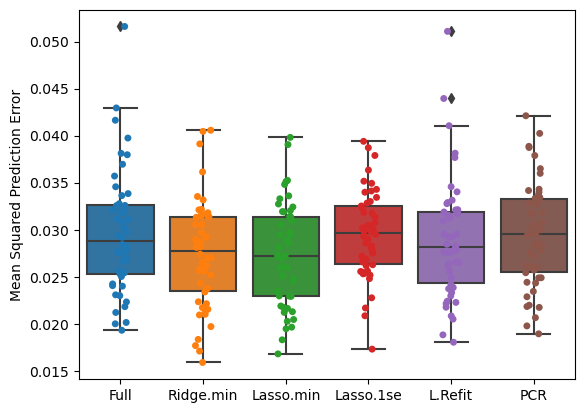

In [34]:
# [b] Graphically summarize findings on the MSPE using a strip chart with a boxplot overlay.

fig, ax = plt.subplots()

bp1 = sns.boxplot(data=MSPE1)
g1 = sns.stripplot(data=MSPE1, ax=ax)

xtick_labels = np.array(["Full", "Ridge.min", "Lasso.min", "Lasso.1se", "L.Refit", "PCR"])
g1.set_xticks(range(xtick_labels.shape[0]), xtick_labels)
ax.set_ylabel('Mean Squared Prediction Error')


plt.show()